## <span style="color:#0070C0; font-weight: 600; font-size:1.2em;"> Demo 3: Creating custom models and analysis

### <span style="color:#0070C0; font-weight: 600; font-size:1.2em;"> Learning objectives

- <span style="font-size:1.3em"> Raster Cell Iterator basics </span>
- <span style="font-size:1.3em"> Customize analysis using RCI and NumPy </span>
- <span style="font-size:1.3em"> Share custom analysis </span>
 

<span style="font-size:1.3em"> **Index notation to access specific cell values in a raster** </span>

In [34]:
import numpy as np
import arcpy
from arcpy.sa import Raster, RasterCellIterator

In [35]:
dem = Raster(r'C:\arcpy-working-with-raster-data-2024\DevSummit\PythonRaster\Data\Demo3\Input\dem')
value_r1c2 = dem[1,2]

<span style="font-size:1.2em"> Value in row 1, column 2: {{value_r1c2}}

### Raster Cell Iterator syntax

In [ ]:
"""EXAMPLE DO NOT RUN -- 
EXPECTED TO FAIL SINCE myraster and mynewraster do not exist"""

with RasterCellIterator({'rasters':[myraster, mynewraster]}) as rci:
    # Accessing the cell with indices r,c
    for r,c in rci:
        """Algorithm that applies to cell with indeces r,c"""
        mynewraster[r,c] = myraster[r,c] + 10

### Example problem: Calculating the steepest downhill neighbor slope

 
<span style="font-size:1.3em"> **Usage:**  A variant of this algorithm is used in watershed delineation and stream extraction. To define these, it is required to know towards which neighbor water will flow. </span>
    
<span style="font-size:1.3em"> **Algorithm:** It picks the steepest of the eight adjacent points slope value,  with the constrains that the point must be lower in elevation than the central point.  The slope value is assigned to the central point. </span>

<img src=>

<span style="font-size:1.3em"> **Reference** Jones, K.H. (1998) A comparison of algorithms used to compute hill slope as a property of the DEM: Computers & Geosciences, vol.24, no.4, p.315-324. </span>

###  <span style="font-size:1.3em">  **Using Raster Cell Iterator (RCI) to calculate the implementation of steepest downhill slope**

In [52]:
arcpy.env.overwriteOutput = True

print('Read input DEM...')

# Read elevation raster
dem = Raster(r'C:\arcpy-working-with-raster-data-2024\DevSummit\PythonRaster\Data\Demo3\Input\dem')

# Access elevation raster properties that will be used in the calculations
cell_x = dem.meanCellWidth
cell_y = dem.meanCellHeight



# Create a new variable that contains the properties of the elevation raster. 
# Used to create a new raster which will contain the result of the calculations.
raster_info = dem.getRasterInfo()



# Modify properties of the elevation raster that do not match with the expected properties of the output raster. 
# In this case, the elevation raster pixel type is 16 Bit. We expect Slope to be a floating point value.
# Set the output pixel type to be float 32 by modifying the raster_info object.
raster_info.setPixelType('F32')

# Create the new raster that will contain the result of the calculations. At this point this is an empty raster.
new_slope = Raster(raster_info)

print('Start calculating steepest downhill neighbor slope...')
with RasterCellIterator({'rasters':[dem, new_slope]}) as rci:
    # Accessing the cell with indices r,c
    for r,c in rci:
        slopes = []
        
        # Iterate through 8 neighbors
        for x,y in [(-1,-1),(-1,0),(1,0),(0,-1),(0,1),(1,1),(-1,1),(1,-1)]:
            # Calculate the slope from center cell to each neighbor
            if dem[r,c] >= dem[r+x,c+y]: # only look for downhill slope
                slope = abs(dem[r,c]-dem[r+x,c+y]) / np.sqrt((x*cell_x)**2+(y*cell_y)**2)
                slopes.append(slope)
        
        # Assign the steepest slope to the output cell value
        if len(slopes) != 0:
            new_slope[r,c] = max(slopes)
        
print('Calculation finished.')
new_slope.save(r'C:\arcpy-working-with-raster-data-2024\DevSummit\PythonRaster\Data\Demo3\Output\new_slope')
print('Output has been saved.')


Read input DEM...
Start calculating steepest downhill neighbor slope...
Calculation finished.
Output has been saved.


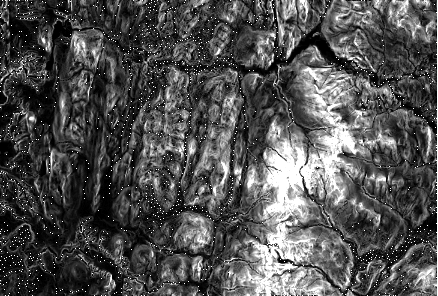

In [53]:
new_slope